In [10]:
def get_spectograms(dop_dat, t_chunk, frames_per_sec, t_chunk_overlap=None, synthetic=False,zero_pad=False):
    frame_overlap = 1
    if t_chunk_overlap is not None:
        frame_overlap = int(t_chunk_overlap * frames_per_sec)
    frame_chunk = int(t_chunk * frames_per_sec)
    if zero_pad == True:
        zero_padding = np.zeros((32,frame_chunk-1))
        dop_dat_spec = np.hstack((zero_padding,np.transpose(dop_dat)))
    else:
        dop_dat_spec = np.transpose(dop_dat)
    spectogram = []
    if zero_pad == True:
        for i in range(0,len(dop_dat), frame_overlap):
            spec = dop_dat_spec[:,i:i+frame_chunk]
            if synthetic == True:
                    spec = cv2.GaussianBlur(spec,(5,5),0)
            spectogram.append(spec)
    else:
        for i in range(0,len(dop_dat)-frame_chunk, frame_overlap):
            
            spec = dop_dat_spec[:,i:i+frame_chunk]
            if synthetic == True:
                if zero_pad == True:
                    spec = cv2.GaussianBlur(spec,(5,5),0)
            spectogram.append(spec)
    spectogram = np.array(spectogram)
    return spectogram

def get32x32rollingwindow(dop_data, overlap):
    window_size = 32
    step_size = window_size - overlap
    num_windows = (dop_data.shape[1] - window_size) // step_size + 1
    
    rolling_windows = []
    for i in range(num_windows):
        start_idx = i * step_size
        end_idx = start_idx + window_size
        window = dop_data[:, start_idx:end_idx]
        rolling_windows.append(window)
    
    rolling_windows = np.array(rolling_windows)  # Shape: (num_windows, 32, 32)
    return rolling_windows

def reconstruct_from_rolling_windows(rolling_windows, overlap):
    window_size = 32
    step_size = window_size - overlap
    num_windows = rolling_windows.shape[0]  # Should be 14
    original_length = step_size * (num_windows - 1) + window_size  # Should reconstruct to 250

    reconstructed = np.zeros((32, original_length))  # Shape: (32, 250)
    count = np.zeros((32, original_length))  # To keep track of contributions

    for i in range(num_windows):
        start_idx = i * step_size
        end_idx = start_idx + window_size
        reconstructed[:, start_idx:end_idx] += rolling_windows[i]  # Sum overlapping regions
        count[:, start_idx:end_idx] += 1  # Count contributions

    # Normalize overlapping regions
    reconstructed /= np.where(count == 0, 1, count)  # Avoid division by zero

    return reconstructed

In [12]:
import numpy as np
# Load the Doppler data
doppler_data_path = r"C:\Users\Maxim\Documents\03 University\04 Msci Project\Midas\doppler_data\radar_data\radar_data\dkk\0\01\doppler_gt.npy"  # Replace with the correct file path
#doppler_data_path = r"C:\Users\Maxim\OneDrive\Documents\03 University\02 Year5\01 Project\reconstructedDopplerData.npy"
doppler_data = np.load(doppler_data_path)
# print(doppler_data.shape)
# print(doppler_data[0].max())
# print(doppler_data[1][:])

windows = get32x32rollingwindow(doppler_data, overlap=16)
print(windows.shape) 

recon_windows = reconstruct_from_rolling_windows(windows, 16)
print(recon_windows.shape)
error = np.abs(doppler_data[:,:240] - recon_windows)
print(error)
np.sum(error)

(14, 32, 32)
(32, 240)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


0.0

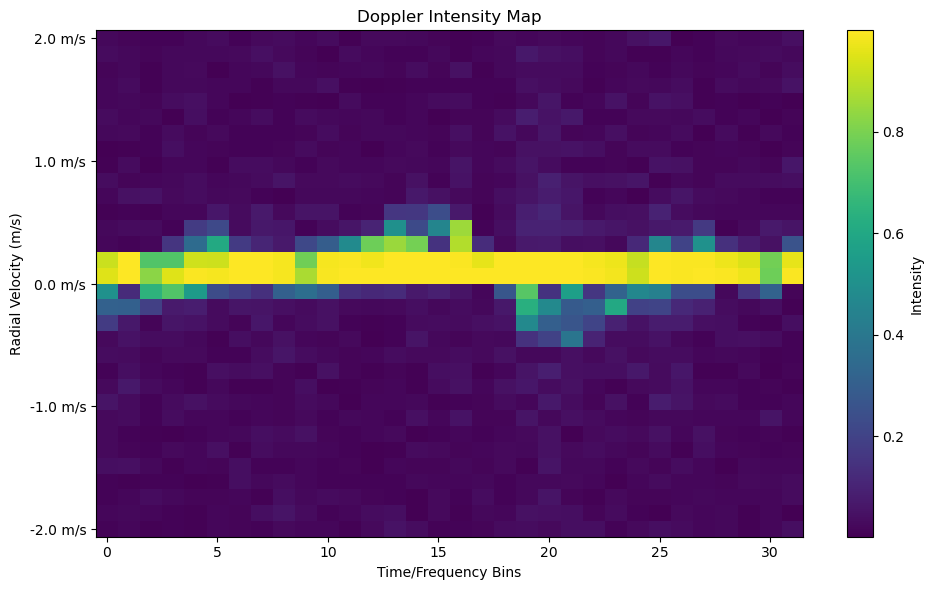

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# Create an intensity map for the Doppler data
plt.figure(figsize=(10, 6))
plt.imshow(windows[2], aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Doppler Intensity Map')
plt.xlabel('Time/Frequency Bins')
plt.ylabel('Radial Velocity (m/s)')

num_channels = windows[2].shape[0]  # Number of sensor channels
y_ticks = np.linspace(0, num_channels - 1, 5)  # Select 5 tick positions
y_labels = np.linspace(-2, 2, 5)  # Corresponding velocity values (-2 to +2)
plt.yticks(y_ticks, [f"{label:.1f} m/s" for label in y_labels])  # Set labels
    
plt.tight_layout()
plt.show()


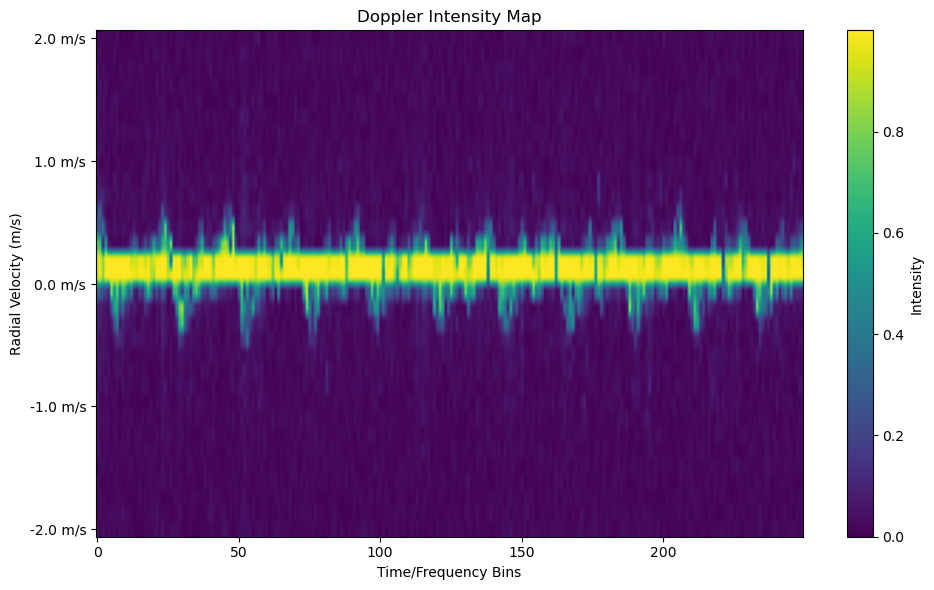

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Create an intensity map for the Doppler data
plt.figure(figsize=(10, 6))
plt.imshow(doppler_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Doppler Intensity Map')
plt.xlabel('Time/Frequency Bins')
plt.ylabel('Radial Velocity (m/s)')

num_channels = doppler_data.shape[0]  # Number of sensor channels
y_ticks = np.linspace(0, num_channels - 1, 5)  # Select 5 tick positions
y_labels = np.linspace(-2, 2, 5)  # Corresponding velocity values (-2 to +2)
plt.yticks(y_ticks, [f"{label:.1f} m/s" for label in y_labels])  # Set labels
    
plt.tight_layout()
plt.show()


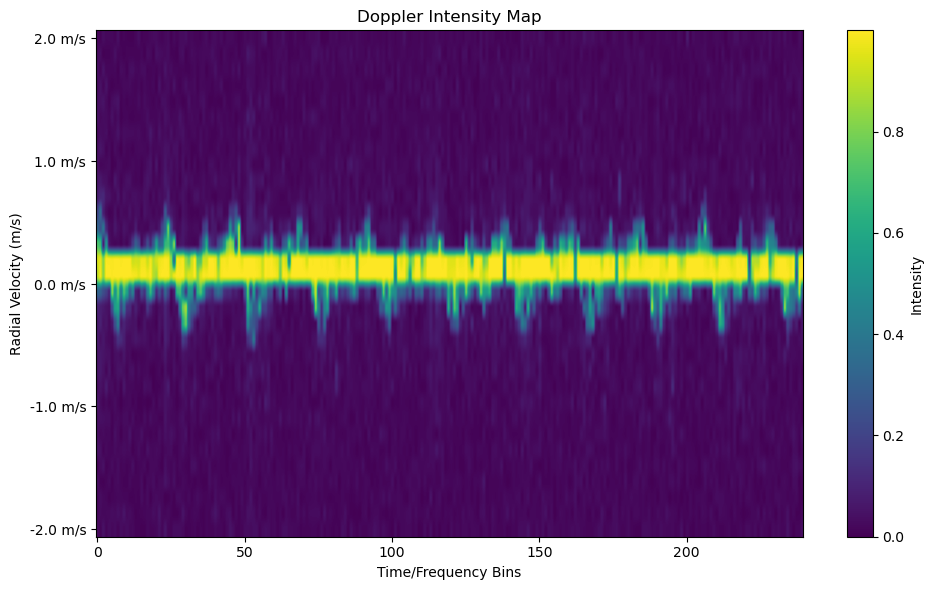

In [6]:


# Create an intensity map for the Doppler data
plt.figure(figsize=(10, 6))
plt.imshow(recon_windows, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Doppler Intensity Map')
plt.xlabel('Time/Frequency Bins')
plt.ylabel('Radial Velocity (m/s)')

num_channels = recon_windows.shape[0]  # Number of sensor channels
y_ticks = np.linspace(0, num_channels - 1, 5)  # Select 5 tick positions
y_labels = np.linspace(-2, 2, 5)  # Corresponding velocity values (-2 to +2)
plt.yticks(y_ticks, [f"{label:.1f} m/s" for label in y_labels])  # Set labels
    
plt.tight_layout()
plt.show()


## DKK

In [12]:
print(dop_data[-1])
print(windows[13].shape)

[0.20684133 0.0110107  0.6045617  0.81607759 0.33336046 0.77705511
 0.05380935 0.04829892 0.57329842 0.91046108 0.15090461 0.24356888
 0.7177181  0.61593633 0.15094189 0.270801   0.97172755 0.42344175
 0.95497777 0.9366713  0.02296286 0.02435843 0.91217381 0.87983504
 0.16399929 0.95850357 0.39290993 0.73142185 0.8169776  0.34954267
 0.29494937 0.20136099 0.65194597 0.63927572 0.01589521 0.2295397
 0.3080836  0.76961826 0.80136022 0.00888383 0.09635151 0.67116331
 0.91197966 0.44850516 0.62738779 0.13708714 0.79788343 0.94483053
 0.90032534 0.58025076 0.49358893 0.31315119 0.99503408 0.05536796
 0.08431662 0.75991288 0.36020669 0.70942417 0.40027892 0.41602249
 0.16246437 0.32853135 0.97611771 0.27872634 0.99185914 0.9896354
 0.618228   0.17967302 0.91448748 0.23749008 0.92378232 0.28218521
 0.17704138 0.42486847 0.16206465 0.34969569 0.5630876  0.23035171
 0.48270836 0.58899728 0.2152008  0.23694486 0.50761675 0.05090384
 0.76241892 0.47463143 0.61636282 0.53719016 0.63991421 0.815189

In [37]:
dkk_log_text = '''
    
---------------------------------
| grad_norm          | 3.86     |
| loss               | 0.653    |
| loss_q0            | 0.654    |
| loss_q1            | 0.344    |
| loss_q2            | 0.417    |
| loss_q4            | 0.174    |
| loss_q6            | 0.216    |
| mse                | 0.735    |
| mse_q0             | 0.736    |
| mse_q1             | 0.327    |
| mse_q2             | 0.397    |
| mse_q4             | 0.15     |
| mse_q6             | 0.195    |
| param_norm         | 140      |
| perceptual_loss    | 0.323    |
| perceptual_loss_q0 | 0.323    |
| perceptual_loss_q1 | 0.415    |
| perceptual_loss_q2 | 0.497    |
| perceptual_loss_q4 | 0.271    |
| perceptual_loss_q6 | 0.298    |
| samples            | 2.59e+04 |
| step               | 100      |
---------------------------------
---------------------------------
| grad_norm          | 3.53     |
| loss               | 0.519    |
| loss_q0            | 0.519    |
| loss_q1            | 0.19     |
| loss_q2            | 0.139    |
| loss_q3            | 0.256    |
| loss_q6            | 0.131    |
| mse                | 0.576    |
| mse_q0             | 0.576    |
| mse_q1             | 0.153    |
| mse_q2             | 0.0986   |
| mse_q3             | 0.227    |
| mse_q6             | 0.093    |
| param_norm         | 140      |
| perceptual_loss    | 0.291    |
| perceptual_loss_q0 | 0.291    |
| perceptual_loss_q1 | 0.34     |
| perceptual_loss_q2 | 0.298    |
| perceptual_loss_q3 | 0.37     |
| perceptual_loss_q6 | 0.281    |
| samples            | 5.15e+04 |
| step               | 200      |
---------------------------------
---------------------------------
| grad_norm          | 2.95     |
| loss               | 0.37     |
| loss_q0            | 0.37     |
| loss_q1            | 0.181    |
| loss_q2            | 0.275    |
| loss_q3            | 0.115    |
| loss_q4            | 0.289    |
| loss_q7            | 0.362    |
| mse                | 0.4      |
| mse_q0             | 0.4      |
| mse_q1             | 0.147    |
| mse_q2             | 0.253    |
| mse_q3             | 0.0813   |
| mse_q4             | 0.267    |
| mse_q7             | 0.35     |
| param_norm         | 140      |
| perceptual_loss    | 0.251    |
| perceptual_loss_q0 | 0.25     |
| perceptual_loss_q1 | 0.317    |
| perceptual_loss_q2 | 0.365    |
| perceptual_loss_q3 | 0.249    |
| perceptual_loss_q4 | 0.379    |
| perceptual_loss_q7 | 0.41     |
| samples            | 7.71e+04 |
| step               | 300      |
---------------------------------
---------------------------------
| grad_norm          | 2.17     |
| loss               | 0.261    |
| loss_q0            | 0.262    |
| loss_q1            | 0.241    |
| loss_q2            | 0.235    |
| loss_q3            | 0.311    |
| loss_q4            | 0.203    |
| loss_q5            | 0.162    |
| mse                | 0.275    |
| mse_q0             | 0.275    |
| mse_q1             | 0.209    |
| mse_q2             | 0.198    |
| mse_q3             | 0.293    |
| mse_q4             | 0.162    |
| mse_q5             | 0.125    |
| param_norm         | 140      |
| perceptual_loss    | 0.208    |
| perceptual_loss_q0 | 0.208    |
| perceptual_loss_q1 | 0.372    |
| perceptual_loss_q2 | 0.382    |
| perceptual_loss_q3 | 0.384    |
| perceptual_loss_q4 | 0.365    |
| perceptual_loss_q5 | 0.31     |
| samples            | 1.03e+05 |
| step               | 400      |
---------------------------------
---------------------------------
| grad_norm          | 1.69     |
| loss               | 0.2      |
| loss_q0            | 0.199    |
| loss_q1            | 0.222    |
| loss_q2            | 0.232    |
| loss_q7            | 0.202    |
| mse                | 0.207    |
| mse_q0             | 0.207    |
| mse_q1             | 0.185    |
| mse_q2             | 0.196    |
| mse_q7             | 0.173    |
| param_norm         | 140      |
| perceptual_loss    | 0.171    |
| perceptual_loss_q0 | 0.171    |
| perceptual_loss_q1 | 0.37     |
| perceptual_loss_q2 | 0.378    |
| perceptual_loss_q7 | 0.32     |
| samples            | 1.28e+05 |
| step               | 500      |
---------------------------------
---------------------------------
| grad_norm          | 1.28     |
| loss               | 0.163    |
| loss_q0            | 0.163    |
| loss_q1            | 0.193    |
| loss_q2            | 0.208    |
| mse                | 0.169    |
| mse_q0             | 0.169    |
| mse_q1             | 0.156    |
| mse_q2             | 0.173    |
| param_norm         | 140      |
| perceptual_loss    | 0.139    |
| perceptual_loss_q0 | 0.139    |
| perceptual_loss_q1 | 0.341    |
| perceptual_loss_q2 | 0.348    |
| samples            | 1.54e+05 |
| step               | 600      |
---------------------------------
---------------------------------
| grad_norm          | 1.21     |
| loss               | 0.142    |
| loss_q0            | 0.142    |
| loss_q1            | 0.184    |
| loss_q2            | 0.24     |
| mse                | 0.147    |
| mse_q0             | 0.147    |
| mse_q1             | 0.148    |
| mse_q2             | 0.214    |
| param_norm         | 140      |
| perceptual_loss    | 0.123    |
| perceptual_loss_q0 | 0.123    |
| perceptual_loss_q1 | 0.329    |
| perceptual_loss_q2 | 0.346    |
| samples            | 1.79e+05 |
| step               | 700      |
---------------------------------
---------------------------------
| grad_norm          | 1.12     |
| loss               | 0.133    |
| loss_q0            | 0.132    |
| loss_q1            | 0.171    |
| loss_q2            | 0.143    |
| mse                | 0.138    |
| mse_q0             | 0.138    |
| mse_q1             | 0.132    |
| mse_q2             | 0.102    |
| param_norm         | 140      |
| perceptual_loss    | 0.112    |
| perceptual_loss_q0 | 0.112    |
| perceptual_loss_q1 | 0.329    |
| perceptual_loss_q2 | 0.307    |
| samples            | 2.05e+05 |
| step               | 800      |
---------------------------------
---------------------------------
| grad_norm          | 1.16     |
| loss               | 0.125    |
| loss_q0            | 0.125    |
| loss_q1            | 0.169    |
| loss_q2            | 0.144    |
| loss_q3            | 0.149    |
| mse                | 0.13     |
| mse_q0             | 0.13     |
| mse_q1             | 0.129    |
| mse_q2             | 0.095    |
| mse_q3             | 0.108    |
| param_norm         | 140      |
| perceptual_loss    | 0.106    |
| perceptual_loss_q0 | 0.105    |
| perceptual_loss_q1 | 0.329    |
| perceptual_loss_q2 | 0.338    |
| perceptual_loss_q3 | 0.311    |
| samples            | 2.31e+05 |
| step               | 900      |
---------------------------------
---------------------------------
| grad_norm          | 1.17     |
| loss               | 0.121    |
| loss_q0            | 0.121    |
| loss_q1            | 0.18     |
| loss_q2            | 0.143    |
| mse                | 0.127    |
| mse_q0             | 0.126    |
| mse_q1             | 0.143    |
| mse_q2             | 0.107    |
| param_norm         | 140      |
| perceptual_loss    | 0.1      |
| perceptual_loss_q0 | 0.1      |
| perceptual_loss_q1 | 0.332    |
| perceptual_loss_q2 | 0.288    |
| samples            | 2.56e+05 |
| step               | 1e+03    |
---------------------------------
---------------------------------
| grad_norm          | 1.18     |
| loss               | 0.116    |
| loss_q0            | 0.116    |
| loss_q1            | 0.145    |
| loss_q2            | 0.205    |
| loss_q4            | 0.221    |
| mse                | 0.121    |
| mse_q0             | 0.121    |
| mse_q1             | 0.105    |
| mse_q2             | 0.17     |
| mse_q4             | 0.193    |
| param_norm         | 141      |
| perceptual_loss    | 0.0959   |
| perceptual_loss_q0 | 0.0955   |
| perceptual_loss_q1 | 0.302    |
| perceptual_loss_q2 | 0.347    |
| perceptual_loss_q4 | 0.335    |
| samples            | 2.82e+05 |
| step               | 1.1e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.1      |
| loss               | 0.111    |
| loss_q0            | 0.111    |
| loss_q1            | 0.163    |
| loss_q2            | 0.193    |
| mse                | 0.117    |
| mse_q0             | 0.117    |
| mse_q1             | 0.129    |
| mse_q2             | 0.152    |
| param_norm         | 141      |
| perceptual_loss    | 0.0894   |
| perceptual_loss_q0 | 0.089    |
| perceptual_loss_q1 | 0.299    |
| perceptual_loss_q2 | 0.357    |
| samples            | 3.07e+05 |
| step               | 1.2e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.23     |
| loss               | 0.107    |
| loss_q0            | 0.107    |
| loss_q1            | 0.145    |
| loss_q2            | 0.179    |
| loss_q3            | 0.205    |
| loss_q4            | 0.32     |
| mse                | 0.113    |
| mse_q0             | 0.112    |
| mse_q1             | 0.109    |
| mse_q2             | 0.135    |
| mse_q3             | 0.173    |
| mse_q4             | 0.3      |
| param_norm         | 141      |
| perceptual_loss    | 0.086    |
| perceptual_loss_q0 | 0.0856   |
| perceptual_loss_q1 | 0.291    |
| perceptual_loss_q2 | 0.352    |
| perceptual_loss_q3 | 0.332    |
| perceptual_loss_q4 | 0.401    |
| samples            | 3.33e+05 |
| step               | 1.3e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.25     |
| loss               | 0.101    |
| loss_q0            | 0.101    |
| loss_q1            | 0.173    |
| loss_q2            | 0.177    |
| loss_q3            | 0.179    |
| mse                | 0.106    |
| mse_q0             | 0.106    |
| mse_q1             | 0.138    |
| mse_q2             | 0.138    |
| mse_q3             | 0.142    |
| param_norm         | 141      |
| perceptual_loss    | 0.0813   |
| perceptual_loss_q0 | 0.0808   |
| perceptual_loss_q1 | 0.312    |
| perceptual_loss_q2 | 0.334    |
| perceptual_loss_q3 | 0.329    |
| samples            | 3.59e+05 |
| step               | 1.4e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.22     |
| loss               | 0.0972   |
| loss_q0            | 0.0972   |
| loss_q1            | 0.153    |
| loss_q2            | 0.186    |
| mse                | 0.103    |
| mse_q0             | 0.103    |
| mse_q1             | 0.118    |
| mse_q2             | 0.155    |
| param_norm         | 141      |
| perceptual_loss    | 0.0758   |
| perceptual_loss_q0 | 0.0753   |
| perceptual_loss_q1 | 0.295    |
| perceptual_loss_q2 | 0.31     |
| samples            | 3.84e+05 |
| step               | 1.5e+03  |
---------------------------------
        ---------------------------------
| grad_norm          | 1.35     |
| loss               | 0.092    |
| loss_q0            | 0.0921   |
| loss_q1            | 0.146    |
| loss_q2            | 0.128    |
| loss_q3            | 0.116    |
| mse                | 0.0972   |
| mse_q0             | 0.0974   |
| mse_q1             | 0.112    |
| mse_q2             | 0.0947   |
| mse_q3             | 0.0649   |
| param_norm         | 141      |
| perceptual_loss    | 0.0712   |
| perceptual_loss_q0 | 0.0709   |
| perceptual_loss_q1 | 0.28     |
| perceptual_loss_q2 | 0.26     |
| perceptual_loss_q3 | 0.318    |
| samples            | 4.1e+05  |
| step               | 1.6e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.35     |
| loss               | 0.087    |
| loss_q0            | 0.0868   |
| loss_q1            | 0.143    |
| loss_q2            | 0.183    |
| mse                | 0.092    |
| mse_q0             | 0.0919   |
| mse_q1             | 0.11     |
| mse_q2             | 0.147    |
| param_norm         | 141      |
| perceptual_loss    | 0.0668   |
| perceptual_loss_q0 | 0.0664   |
| perceptual_loss_q1 | 0.277    |
| perceptual_loss_q2 | 0.328    |
| samples            | 4.35e+05 |
| step               | 1.7e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.2      |
| loss               | 0.0813   |
| loss_q0            | 0.0812   |
| loss_q1            | 0.129    |
| loss_q2            | 0.0875   |
| loss_q3            | 0.1      |
| loss_q4            | 0.113    |
| mse                | 0.0863   |
| mse_q0             | 0.0864   |
| mse_q1             | 0.0975   |
| mse_q2             | 0.0478   |
| mse_q3             | 0.0547   |
| mse_q4             | 0.0692   |
| param_norm         | 141      |
| perceptual_loss    | 0.061    |
| perceptual_loss_q0 | 0.0607   |
| perceptual_loss_q1 | 0.257    |
| perceptual_loss_q2 | 0.247    |
| perceptual_loss_q3 | 0.283    |
| perceptual_loss_q4 | 0.289    |
| samples            | 4.61e+05 |
| step               | 1.8e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.27     |
| loss               | 0.0759   |
| loss_q0            | 0.0759   |
| loss_q1            | 0.106    |
| loss_q2            | 0.159    |
| loss_q4            | 0.0798   |
| mse                | 0.081    |
| mse_q0             | 0.0811   |
| mse_q1             | 0.073    |
| mse_q2             | 0.115    |
| mse_q4             | 0.0424   |
| param_norm         | 141      |
| perceptual_loss    | 0.0555   |
| perceptual_loss_q0 | 0.0552   |
| perceptual_loss_q1 | 0.24     |
| perceptual_loss_q2 | 0.332    |
| perceptual_loss_q4 | 0.229    |
| samples            | 4.87e+05 |
| step               | 1.9e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.16     |
| loss               | 0.0705   |
| loss_q0            | 0.0704   |
| loss_q1            | 0.1      |
| loss_q2            | 0.0864   |
| loss_q3            | 0.0893   |
| mse                | 0.0752   |
| mse_q0             | 0.0752   |
| mse_q1             | 0.0692   |
| mse_q2             | 0.0482   |
| mse_q3             | 0.0489   |
| param_norm         | 141      |
| perceptual_loss    | 0.0518   |
| perceptual_loss_q0 | 0.0514   |
| perceptual_loss_q1 | 0.225    |
| perceptual_loss_q2 | 0.239    |
| perceptual_loss_q3 | 0.251    |
| samples            | 5.12e+05 |
| step               | 2e+03    |
---------------------------------
---------------------------------
| grad_norm          | 1.17     |
| loss               | 0.0676   |
| loss_q0            | 0.0675   |
| loss_q1            | 0.0761   |
| loss_q2            | 0.198    |
| loss_q3            | 0.16     |
| mse                | 0.0724   |
| mse_q0             | 0.0723   |
| mse_q1             | 0.0456   |
| mse_q2             | 0.171    |
| mse_q3             | 0.129    |
| param_norm         | 141      |
| perceptual_loss    | 0.0481   |
| perceptual_loss_q0 | 0.0479   |
| perceptual_loss_q1 | 0.198    |
| perceptual_loss_q2 | 0.307    |
| perceptual_loss_q3 | 0.286    |
| samples            | 5.38e+05 |
| step               | 2.1e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.05     |
| loss               | 0.0631   |
| loss_q0            | 0.063    |
| loss_q1            | 0.0786   |
| loss_q2            | 0.0939   |
| loss_q3            | 0.0958   |
| mse                | 0.0674   |
| mse_q0             | 0.0674   |
| mse_q1             | 0.0497   |
| mse_q2             | 0.0577   |
| mse_q3             | 0.0573   |
| param_norm         | 141      |
| perceptual_loss    | 0.0457   |
| perceptual_loss_q0 | 0.0454   |
| perceptual_loss_q1 | 0.194    |
| perceptual_loss_q2 | 0.239    |
| perceptual_loss_q3 | 0.25     |
| samples            | 5.63e+05 |
| step               | 2.2e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.87     |
| loss               | 0.0616   |
| loss_q0            | 0.0616   |
| loss_q1            | 0.0657   |
| loss_q2            | 0.12     |
| loss_q3            | 0.121    |
| mse                | 0.0661   |
| mse_q0             | 0.0663   |
| mse_q1             | 0.0379   |
| mse_q2             | 0.093    |
| mse_q3             | 0.0731   |
| param_norm         | 141      |
| perceptual_loss    | 0.0432   |
| perceptual_loss_q0 | 0.0429   |
| perceptual_loss_q1 | 0.177    |
| perceptual_loss_q2 | 0.226    |
| perceptual_loss_q3 | 0.31     |
| samples            | 5.89e+05 |
| step               | 2.3e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.02     |
| loss               | 0.059    |
| loss_q0            | 0.059    |
| loss_q1            | 0.0692   |
| loss_q2            | 0.0934   |
| loss_q3            | 0.0756   |
| loss_q4            | 0.0754   |
| mse                | 0.0633   |
| mse_q0             | 0.0633   |
| mse_q1             | 0.0429   |
| mse_q2             | 0.0617   |
| mse_q3             | 0.0437   |
| mse_q4             | 0.0489   |
| param_norm         | 141      |
| perceptual_loss    | 0.0418   |
| perceptual_loss_q0 | 0.0415   |
| perceptual_loss_q1 | 0.174    |
| perceptual_loss_q2 | 0.221    |
| perceptual_loss_q3 | 0.203    |
| perceptual_loss_q4 | 0.181    |
| samples            | 6.15e+05 |
| step               | 2.4e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.874    |
| loss               | 0.0576   |
| loss_q0            | 0.0576   |
| loss_q1            | 0.0586   |
| loss_q2            | 0.0633   |
| loss_q3            | 0.0726   |
| mse                | 0.062    |
| mse_q0             | 0.062    |
| mse_q1             | 0.0352   |
| mse_q2             | 0.0261   |
| mse_q3             | 0.039    |
| param_norm         | 141      |
| perceptual_loss    | 0.0404   |
| perceptual_loss_q0 | 0.0402   |
| perceptual_loss_q1 | 0.152    |
| perceptual_loss_q2 | 0.212    |
| perceptual_loss_q3 | 0.207    |
| samples            | 6.4e+05  |
| step               | 2.5e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.877    |
| loss               | 0.0565   |
| loss_q0            | 0.0565   |
| loss_q1            | 0.0613   |
| loss_q2            | 0.0794   |
| loss_q3            | 0.0902   |
| mse                | 0.0608   |
| mse_q0             | 0.0609   |
| mse_q1             | 0.036    |
| mse_q2             | 0.0487   |
| mse_q3             | 0.0598   |
| param_norm         | 141      |
| perceptual_loss    | 0.0395   |
| perceptual_loss_q0 | 0.0392   |
| perceptual_loss_q1 | 0.163    |
| perceptual_loss_q2 | 0.202    |
| perceptual_loss_q3 | 0.212    |
| samples            | 6.66e+05 |
| step               | 2.6e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.766    |
| loss               | 0.0539   |
| loss_q0            | 0.054    |
| loss_q1            | 0.0608   |
| loss_q2            | 0.078    |
| loss_q3            | 0.0569   |
| mse                | 0.0578   |
| mse_q0             | 0.0579   |
| mse_q1             | 0.0371   |
| mse_q2             | 0.0486   |
| mse_q3             | 0.0269   |
| param_norm         | 141      |
| perceptual_loss    | 0.0385   |
| perceptual_loss_q0 | 0.0383   |
| perceptual_loss_q1 | 0.156    |
| perceptual_loss_q2 | 0.196    |
| perceptual_loss_q3 | 0.177    |
| samples            | 6.91e+05 |
| step               | 2.7e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.755    |
| loss               | 0.054    |
| loss_q0            | 0.0539   |
| loss_q1            | 0.0553   |
| loss_q2            | 0.0795   |
| loss_q3            | 0.126    |
| mse                | 0.058    |
| mse_q0             | 0.058    |
| mse_q1             | 0.0333   |
| mse_q2             | 0.0577   |
| mse_q3             | 0.102    |
| param_norm         | 141      |
| perceptual_loss    | 0.0378   |
| perceptual_loss_q0 | 0.0376   |
| perceptual_loss_q1 | 0.143    |
| perceptual_loss_q2 | 0.167    |
| perceptual_loss_q3 | 0.222    |
| samples            | 7.17e+05 |
| step               | 2.8e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.714    |
| loss               | 0.0533   |
| loss_q0            | 0.0532   |
| loss_q1            | 0.0545   |
| loss_q2            | 0.0757   |
| mse                | 0.0573   |
| mse_q0             | 0.0573   |
| mse_q1             | 0.0325   |
| mse_q2             | 0.0391   |
| param_norm         | 141      |
| perceptual_loss    | 0.0373   |
| perceptual_loss_q0 | 0.0372   |
| perceptual_loss_q1 | 0.143    |
| perceptual_loss_q2 | 0.222    |
| samples            | 7.43e+05 |
| step               | 2.9e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.667    |
| loss               | 0.053    |
| loss_q0            | 0.053    |
| loss_q1            | 0.0556   |
| loss_q2            | 0.0742   |
| loss_q4            | 0.0823   |
| mse                | 0.057    |
| mse_q0             | 0.057    |
| mse_q1             | 0.0324   |
| mse_q2             | 0.0439   |
| mse_q4             | 0.0524   |
| param_norm         | 141      |
| perceptual_loss    | 0.037    |
| perceptual_loss_q0 | 0.0368   |
| perceptual_loss_q1 | 0.149    |
| perceptual_loss_q2 | 0.196    |
| perceptual_loss_q4 | 0.202    |
| samples            | 7.68e+05 |
| step               | 3e+03    |
---------------------------------

'''

In [38]:
zzh_log_text = '''
---------------------------------
| grad_norm          | 3.95     |
| loss               | 0.645    |
| loss_q0            | 0.646    |
| loss_q1            | 0.309    |
| mse                | 0.726    |
| mse_q0             | 0.727    |
| mse_q1             | 0.287    |
| param_norm         | 140      |
| perceptual_loss    | 0.321    |
| perceptual_loss_q0 | 0.321    |
| perceptual_loss_q1 | 0.394    |
| samples            | 2.59e+04 |
| step               | 100      |
---------------------------------
---------------------------------
| grad_norm          | 3.82     |
| loss               | 0.5      |
| loss_q0            | 0.501    |
| loss_q1            | 0.215    |
| loss_q2            | 0.173    |
| loss_q4            | 0.24     |
| mse                | 0.555    |
| mse_q0             | 0.556    |
| mse_q1             | 0.186    |
| mse_q2             | 0.135    |
| mse_q4             | 0.212    |
| param_norm         | 140      |
| perceptual_loss    | 0.281    |
| perceptual_loss_q0 | 0.281    |
| perceptual_loss_q1 | 0.335    |
| perceptual_loss_q2 | 0.325    |
| perceptual_loss_q4 | 0.353    |
| samples            | 5.15e+04 |
| step               | 200      |
---------------------------------
---------------------------------
| grad_norm          | 2.99     |
| loss               | 0.352    |
| loss_q0            | 0.352    |
| loss_q1            | 0.152    |
| loss_q2            | 0.239    |
| loss_q3            | 0.242    |
| mse                | 0.381    |
| mse_q0             | 0.382    |
| mse_q1             | 0.113    |
| mse_q2             | 0.207    |
| mse_q3             | 0.224    |
| param_norm         | 140      |
| perceptual_loss    | 0.236    |
| perceptual_loss_q0 | 0.236    |
| perceptual_loss_q1 | 0.31     |
| perceptual_loss_q2 | 0.367    |
| perceptual_loss_q3 | 0.316    |
| samples            | 7.71e+04 |
| step               | 300      |
---------------------------------
---------------------------------
| grad_norm          | 2.19     |
| loss               | 0.248    |
| loss_q0            | 0.248    |
| loss_q1            | 0.2      |
| loss_q2            | 0.193    |
| loss_q3            | 0.231    |
| mse                | 0.26     |
| mse_q0             | 0.26     |
| mse_q1             | 0.163    |
| mse_q2             | 0.16     |
| mse_q3             | 0.189    |
| param_norm         | 140      |
| perceptual_loss    | 0.197    |
| perceptual_loss_q0 | 0.197    |
| perceptual_loss_q1 | 0.351    |
| perceptual_loss_q2 | 0.328    |
| perceptual_loss_q3 | 0.402    |
| samples            | 1.03e+05 |
| step               | 400      |
---------------------------------
---------------------------------
| grad_norm          | 1.64     |
| loss               | 0.187    |
| loss_q0            | 0.187    |
| loss_q1            | 0.195    |
| loss_q2            | 0.19     |
| loss_q3            | 0.137    |
| mse                | 0.193    |
| mse_q0             | 0.193    |
| mse_q1             | 0.158    |
| mse_q2             | 0.15     |
| mse_q3             | 0.0994   |
| param_norm         | 140      |
| perceptual_loss    | 0.162    |
| perceptual_loss_q0 | 0.161    |
| perceptual_loss_q1 | 0.346    |
| perceptual_loss_q2 | 0.354    |
| perceptual_loss_q3 | 0.287    |
| samples            | 1.28e+05 |
| step               | 500      |
---------------------------------
---------------------------------
| grad_norm          | 1.47     |
| loss               | 0.151    |
| loss_q0            | 0.151    |
| loss_q1            | 0.164    |
| loss_q2            | 0.152    |
| loss_q3            | 0.16     |
| loss_q4            | 0.218    |
| mse                | 0.156    |
| mse_q0             | 0.156    |
| mse_q1             | 0.126    |
| mse_q2             | 0.118    |
| mse_q3             | 0.123    |
| mse_q4             | 0.191    |
| param_norm         | 140      |
| perceptual_loss    | 0.134    |
| perceptual_loss_q0 | 0.134    |
| perceptual_loss_q1 | 0.315    |
| perceptual_loss_q2 | 0.29     |
| perceptual_loss_q3 | 0.309    |
| perceptual_loss_q4 | 0.324    |
| samples            | 1.54e+05 |
| step               | 600      |
---------------------------------
---------------------------------
| grad_norm          | 1.2      |
| loss               | 0.132    |
| loss_q0            | 0.132    |
| loss_q1            | 0.156    |
| loss_q2            | 0.166    |
| loss_q3            | 0.166    |
| loss_q4            | 0.278    |
| mse                | 0.137    |
| mse_q0             | 0.137    |
| mse_q1             | 0.116    |
| mse_q2             | 0.12     |
| mse_q3             | 0.135    |
| mse_q4             | 0.248    |
| param_norm         | 140      |
| perceptual_loss    | 0.116    |
| perceptual_loss_q0 | 0.115    |
| perceptual_loss_q1 | 0.314    |
| perceptual_loss_q2 | 0.354    |
| perceptual_loss_q3 | 0.292    |
| perceptual_loss_q4 | 0.399    |
| samples            | 1.79e+05 |
| step               | 700      |
---------------------------------
---------------------------------
| grad_norm          | 1.15     |
| loss               | 0.123    |
| loss_q0            | 0.123    |
| loss_q1            | 0.151    |
| loss_q2            | 0.149    |
| loss_q3            | 0.145    |
| mse                | 0.127    |
| mse_q0             | 0.127    |
| mse_q1             | 0.115    |
| mse_q2             | 0.11     |
| mse_q3             | 0.11     |
| param_norm         | 140      |
| perceptual_loss    | 0.106    |
| perceptual_loss_q0 | 0.106    |
| perceptual_loss_q1 | 0.293    |
| perceptual_loss_q2 | 0.306    |
| perceptual_loss_q3 | 0.288    |
| samples            | 2.05e+05 |
| step               | 800      |
---------------------------------
---------------------------------
| grad_norm          | 1.12     |
| loss               | 0.116    |
| loss_q0            | 0.116    |
| loss_q1            | 0.157    |
| loss_q2            | 0.23     |
| loss_q3            | 0.135    |
| mse                | 0.121    |
| mse_q0             | 0.12     |
| mse_q1             | 0.122    |
| mse_q2             | 0.198    |
| mse_q3             | 0.0992   |
| param_norm         | 140      |
| perceptual_loss    | 0.0986   |
| perceptual_loss_q0 | 0.0982   |
| perceptual_loss_q1 | 0.297    |
| perceptual_loss_q2 | 0.359    |
| perceptual_loss_q3 | 0.28     |
| samples            | 2.31e+05 |
| step               | 900      |
---------------------------------
---------------------------------
| grad_norm          | 1.22     |
| loss               | 0.11     |
| loss_q0            | 0.11     |
| loss_q1            | 0.154    |
| loss_q2            | 0.15     |
| mse                | 0.114    |
| mse_q0             | 0.114    |
| mse_q1             | 0.117    |
| mse_q2             | 0.106    |
| param_norm         | 141      |
| perceptual_loss    | 0.0947   |
| perceptual_loss_q0 | 0.0943   |
| perceptual_loss_q1 | 0.302    |
| perceptual_loss_q2 | 0.324    |
| samples            | 2.56e+05 |
| step               | 1e+03    |
---------------------------------
---------------------------------
| grad_norm          | 1.21     |
| loss               | 0.105    |
| loss_q0            | 0.105    |
| loss_q1            | 0.152    |
| loss_q2            | 0.0929   |
| mse                | 0.109    |
| mse_q0             | 0.109    |
| mse_q1             | 0.117    |
| mse_q2             | 0.0553   |
| param_norm         | 141      |
| perceptual_loss    | 0.0884   |
| perceptual_loss_q0 | 0.0882   |
| perceptual_loss_q1 | 0.295    |
| perceptual_loss_q2 | 0.243    |
| samples            | 2.82e+05 |
| step               | 1.1e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.21     |
| loss               | 0.101    |
| loss_q0            | 0.101    |
| loss_q1            | 0.154    |
| loss_q2            | 0.159    |
| loss_q3            | 0.214    |
| loss_q4            | 0.207    |
| mse                | 0.105    |
| mse_q0             | 0.105    |
| mse_q1             | 0.118    |
| mse_q2             | 0.126    |
| mse_q3             | 0.184    |
| mse_q4             | 0.18     |
| param_norm         | 141      |
| perceptual_loss    | 0.0846   |
| perceptual_loss_q0 | 0.0845   |
| perceptual_loss_q1 | 0.298    |
| perceptual_loss_q2 | 0.288    |
| perceptual_loss_q3 | 0.333    |
| perceptual_loss_q4 | 0.313    |
| samples            | 3.07e+05 |
| step               | 1.2e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.11     |
| loss               | 0.0971   |
| loss_q0            | 0.097    |
| loss_q1            | 0.139    |
| loss_q2            | 0.127    |
| loss_q6            | 0.137    |
| mse                | 0.102    |
| mse_q0             | 0.102    |
| mse_q1             | 0.105    |
| mse_q2             | 0.0872   |
| mse_q6             | 0.11     |
| param_norm         | 141      |
| perceptual_loss    | 0.0787   |
| perceptual_loss_q0 | 0.0783   |
| perceptual_loss_q1 | 0.274    |
| perceptual_loss_q2 | 0.288    |
| perceptual_loss_q6 | 0.244    |
| samples            | 3.33e+05 |
| step               | 1.3e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.24     |
| loss               | 0.0913   |
| loss_q0            | 0.0913   |
| loss_q1            | 0.13     |
| loss_q2            | 0.141    |
| mse                | 0.0954   |
| mse_q0             | 0.0954   |
| mse_q1             | 0.0933   |
| mse_q2             | 0.108    |
| param_norm         | 141      |
| perceptual_loss    | 0.075    |
| perceptual_loss_q0 | 0.0746   |
| perceptual_loss_q1 | 0.275    |
| perceptual_loss_q2 | 0.271    |
| samples            | 3.59e+05 |
| step               | 1.4e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.27     |
| loss               | 0.0868   |
| loss_q0            | 0.0868   |
| loss_q1            | 0.135    |
| loss_q2            | 0.218    |
| loss_q4            | 0.199    |
| mse                | 0.0912   |
| mse_q0             | 0.0912   |
| mse_q1             | 0.0986   |
| mse_q2             | 0.186    |
| mse_q4             | 0.162    |
| param_norm         | 141      |
| perceptual_loss    | 0.0694   |
| perceptual_loss_q0 | 0.069    |
| perceptual_loss_q1 | 0.279    |
| perceptual_loss_q2 | 0.346    |
| perceptual_loss_q4 | 0.346    |
| samples            | 3.84e+05 |
| step               | 1.5e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.23     |
| loss               | 0.0821   |
| loss_q0            | 0.082    |
| loss_q1            | 0.129    |
| loss_q2            | 0.154    |
| loss_q3            | 0.0927   |
| mse                | 0.0866   |
| mse_q0             | 0.0865   |
| mse_q1             | 0.0959   |
| mse_q2             | 0.121    |
| mse_q3             | 0.0549   |
| param_norm         | 141      |
| perceptual_loss    | 0.0642   |
| perceptual_loss_q0 | 0.0638   |
| perceptual_loss_q1 | 0.26     |
| perceptual_loss_q2 | 0.285    |
| perceptual_loss_q3 | 0.244    |
| samples            | 4.1e+05  |
| step               | 1.6e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.3      |
| loss               | 0.0757   |
| loss_q0            | 0.0756   |
| loss_q1            | 0.109    |
| loss_q2            | 0.18     |
| mse                | 0.0799   |
| mse_q0             | 0.0799   |
| mse_q1             | 0.0778   |
| mse_q2             | 0.145    |
| param_norm         | 141      |
| perceptual_loss    | 0.0588   |
| perceptual_loss_q0 | 0.0585   |
| perceptual_loss_q1 | 0.234    |
| perceptual_loss_q2 | 0.32     |
| samples            | 4.35e+05 |
| step               | 1.7e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.15     |
| loss               | 0.071    |
| loss_q0            | 0.071    |
| loss_q1            | 0.0913   |
| loss_q2            | 0.0873   |
| loss_q3            | 0.118    |
| loss_q6            | 0.0992   |
| mse                | 0.0754   |
| mse_q0             | 0.0754   |
| mse_q1             | 0.0596   |
| mse_q2             | 0.0501   |
| mse_q3             | 0.078    |
| mse_q6             | 0.0663   |
| param_norm         | 141      |
| perceptual_loss    | 0.0535   |
| perceptual_loss_q0 | 0.0532   |
| perceptual_loss_q1 | 0.218    |
| perceptual_loss_q2 | 0.236    |
| perceptual_loss_q3 | 0.276    |
| perceptual_loss_q6 | 0.231    |
| samples            | 4.61e+05 |
| step               | 1.8e+03  |
---------------------------------
---------------------------------
| grad_norm          | 1.02     |
| loss               | 0.0667   |
| loss_q0            | 0.0667   |
| loss_q1            | 0.0794   |
| loss_q2            | 0.0722   |
| loss_q3            | 0.0981   |
| mse                | 0.071    |
| mse_q0             | 0.0711   |
| mse_q1             | 0.0498   |
| mse_q2             | 0.0415   |
| mse_q3             | 0.0654   |
| param_norm         | 141      |
| perceptual_loss    | 0.0492   |
| perceptual_loss_q0 | 0.049    |
| perceptual_loss_q1 | 0.198    |
| perceptual_loss_q2 | 0.195    |
| perceptual_loss_q3 | 0.229    |
| samples            | 4.87e+05 |
| step               | 1.9e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.982    |
| loss               | 0.0636   |
| loss_q0            | 0.0636   |
| loss_q1            | 0.0742   |
| loss_q2            | 0.0867   |
| loss_q3            | 0.0933   |
| mse                | 0.068    |
| mse_q0             | 0.068    |
| mse_q1             | 0.0457   |
| mse_q2             | 0.0507   |
| mse_q3             | 0.0473   |
| param_norm         | 141      |
| perceptual_loss    | 0.0462   |
| perceptual_loss_q0 | 0.0459   |
| perceptual_loss_q1 | 0.188    |
| perceptual_loss_q2 | 0.23     |
| perceptual_loss_q3 | 0.277    |
| samples            | 5.12e+05 |
| step               | 2e+03    |
---------------------------------
---------------------------------
| grad_norm          | 0.889    |
| loss               | 0.0606   |
| loss_q0            | 0.0606   |
| loss_q1            | 0.0673   |
| loss_q2            | 0.0823   |
| mse                | 0.0649   |
| mse_q0             | 0.0649   |
| mse_q1             | 0.0409   |
| mse_q2             | 0.0508   |
| param_norm         | 141      |
| perceptual_loss    | 0.0437   |
| perceptual_loss_q0 | 0.0435   |
| perceptual_loss_q1 | 0.173    |
| perceptual_loss_q2 | 0.209    |
| samples            | 5.38e+05 |
| step               | 2.1e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.896    |
| loss               | 0.0574   |
| loss_q0            | 0.0575   |
| loss_q1            | 0.064    |
| loss_q2            | 0.0737   |
| loss_q3            | 0.0883   |
| loss_q4            | 0.0892   |
| mse                | 0.0613   |
| mse_q0             | 0.0615   |
| mse_q1             | 0.0378   |
| mse_q2             | 0.0405   |
| mse_q3             | 0.0541   |
| mse_q4             | 0.0557   |
| param_norm         | 141      |
| perceptual_loss    | 0.042    |
| perceptual_loss_q0 | 0.0417   |
| perceptual_loss_q1 | 0.169    |
| perceptual_loss_q2 | 0.206    |
| perceptual_loss_q3 | 0.225    |
| perceptual_loss_q4 | 0.223    |
| samples            | 5.63e+05 |
| step               | 2.2e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.805    |
| loss               | 0.055    |
| loss_q0            | 0.055    |
| loss_q1            | 0.0615   |
| loss_q2            | 0.0792   |
| loss_q3            | 0.095    |
| loss_q4            | 0.0926   |
| mse                | 0.0587   |
| mse_q0             | 0.0588   |
| mse_q1             | 0.0351   |
| mse_q2             | 0.0466   |
| mse_q3             | 0.0581   |
| mse_q4             | 0.0562   |
| param_norm         | 141      |
| perceptual_loss    | 0.0401   |
| perceptual_loss_q0 | 0.0398   |
| perceptual_loss_q1 | 0.167    |
| perceptual_loss_q2 | 0.21     |
| perceptual_loss_q3 | 0.243    |
| perceptual_loss_q4 | 0.238    |
| samples            | 5.89e+05 |
| step               | 2.3e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.822    |
| loss               | 0.0539   |
| loss_q0            | 0.0539   |
| loss_q1            | 0.0577   |
| loss_q3            | 0.0899   |
| mse                | 0.0576   |
| mse_q0             | 0.0577   |
| mse_q1             | 0.0321   |
| mse_q3             | 0.051    |
| param_norm         | 141      |
| perceptual_loss    | 0.0389   |
| perceptual_loss_q0 | 0.0388   |
| perceptual_loss_q1 | 0.16     |
| perceptual_loss_q3 | 0.246    |
| samples            | 6.15e+05 |
| step               | 2.4e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.762    |
| loss               | 0.0523   |
| loss_q0            | 0.0524   |
| loss_q1            | 0.0601   |
| loss_q2            | 0.0767   |
| loss_q7            | 0.0849   |
| mse                | 0.0559   |
| mse_q0             | 0.056    |
| mse_q1             | 0.0349   |
| mse_q2             | 0.0403   |
| mse_q7             | 0.0483   |
| param_norm         | 141      |
| perceptual_loss    | 0.0379   |
| perceptual_loss_q0 | 0.0377   |
| perceptual_loss_q1 | 0.161    |
| perceptual_loss_q2 | 0.222    |
| perceptual_loss_q7 | 0.231    |
| samples            | 6.4e+05  |
| step               | 2.5e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.778    |
| loss               | 0.0508   |
| loss_q0            | 0.0507   |
| loss_q1            | 0.0519   |
| loss_q4            | 0.0867   |
| mse                | 0.0542   |
| mse_q0             | 0.0542   |
| mse_q1             | 0.0273   |
| mse_q4             | 0.0522   |
| param_norm         | 141      |
| perceptual_loss    | 0.0371   |
| perceptual_loss_q0 | 0.0369   |
| perceptual_loss_q1 | 0.15     |
| perceptual_loss_q4 | 0.225    |
| samples            | 6.66e+05 |
| step               | 2.6e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.731    |
| loss               | 0.0503   |
| loss_q0            | 0.0503   |
| loss_q1            | 0.0523   |
| loss_q2            | 0.0703   |
| loss_q4            | 0.0793   |
| mse                | 0.0538   |
| mse_q0             | 0.0539   |
| mse_q1             | 0.0258   |
| mse_q2             | 0.0353   |
| mse_q4             | 0.0487   |
| param_norm         | 141      |
| perceptual_loss    | 0.0364   |
| perceptual_loss_q0 | 0.0362   |
| perceptual_loss_q1 | 0.158    |
| perceptual_loss_q2 | 0.21     |
| perceptual_loss_q4 | 0.202    |
| samples            | 6.91e+05 |
| step               | 2.7e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.678    |
| loss               | 0.0494   |
| loss_q0            | 0.0494   |
| loss_q1            | 0.0555   |
| loss_q2            | 0.082    |
| loss_q4            | 0.0823   |
| mse                | 0.0528   |
| mse_q0             | 0.0528   |
| mse_q1             | 0.0302   |
| mse_q2             | 0.0545   |
| mse_q4             | 0.0509   |
| param_norm         | 141      |
| perceptual_loss    | 0.0358   |
| perceptual_loss_q0 | 0.0356   |
| perceptual_loss_q1 | 0.156    |
| perceptual_loss_q2 | 0.192    |
| perceptual_loss_q4 | 0.208    |
| samples            | 7.17e+05 |
| step               | 2.8e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.642    |
| loss               | 0.0493   |
| loss_q0            | 0.0493   |
| loss_q1            | 0.0572   |
| loss_q2            | 0.0712   |
| mse                | 0.0528   |
| mse_q0             | 0.0528   |
| mse_q1             | 0.0329   |
| mse_q2             | 0.0343   |
| param_norm         | 141      |
| perceptual_loss    | 0.0354   |
| perceptual_loss_q0 | 0.0352   |
| perceptual_loss_q1 | 0.154    |
| perceptual_loss_q2 | 0.219    |
| samples            | 7.43e+05 |
| step               | 2.9e+03  |
---------------------------------
---------------------------------
| grad_norm          | 0.61     |
| loss               | 0.048    |
| loss_q0            | 0.0479   |
| loss_q1            | 0.0548   |
| loss_q2            | 0.0931   |
| loss_q3            | 0.0773   |
| mse                | 0.0511   |
| mse_q0             | 0.0512   |
| mse_q1             | 0.0298   |
| mse_q2             | 0.0507   |
| mse_q3             | 0.0439   |
| param_norm         | 141      |
| perceptual_loss    | 0.0352   |
| perceptual_loss_q0 | 0.0351   |
| perceptual_loss_q1 | 0.155    |
| perceptual_loss_q2 | 0.262    |
| perceptual_loss_q3 | 0.211    |
| samples            | 7.68e+05 |
| step               | 3e+03    |
---------------------------------
'''

In [39]:
import re
import numpy as np

def extract_metrics(log_text):
    pattern = re.compile(
        r"\|\s*loss\s*\|\s*([\d\.e+-]+)\s*\|" 
        r".*?\|\s*mse\s*\|\s*([\d\.e+-]+)\s*\|"
        r".*?\|\s*perceptual_loss\s*\|\s*([\d\.e+-]+)\s*\|"
        r".*?\|\s*step\s*\|\s*([\d\.e+-]+)\s*\|",  # Allows for scientific notation in step
        re.DOTALL
    )
    
    matches = pattern.findall(log_text)
    results = [
        {
            "step": int(float(step)),  # Convert scientific notation to integer
            "loss": float(loss),
            "mse": float(mse),
            "perceptual_loss": float(perceptual_loss)
        }
        for loss, mse, perceptual_loss, step in matches
    ]
    
    return results

extracted_data_dkk = extract_metrics(dkk_log_text)
extracted_data_zzh = extract_metrics(zzh_log_text)

# Convert to NumPy arrays
loss_array_dkk = np.array([entry['loss'] for entry in extracted_data_dkk])
mse_array_dkk = np.array([entry['mse'] for entry in extracted_data_dkk])
perceptual_loss_array_dkk = np.array([entry['perceptual_loss'] for entry in extracted_data_dkk])

loss_array_zzh = np.array([entry['loss'] for entry in extracted_data_zzh])
mse_array_zzh = np.array([entry['mse'] for entry in extracted_data_zzh])
perceptual_loss_array_zzh = np.array([entry['perceptual_loss'] for entry in extracted_data_zzh])

steps_array = np.array([entry['step'] for entry in extracted_data_dkk])

loss_array = np.mean([loss_array_dkk, loss_array_zzh], axis=0)
mse_array = np.mean([mse_array_dkk, mse_array_zzh], axis=0)
perceptual_loss_array = np.mean([perceptual_loss_array_dkk,perceptual_loss_array_zzh], axis=0)

# Print results
print("Loss:", loss_array)
print("MSE:", mse_array)
print("Perceptual Loss:", perceptual_loss_array)
print("Steps:", steps_array)


Loss: [0.649   0.5095  0.361   0.2545  0.1935  0.157   0.137   0.128   0.1205
 0.1155  0.1105  0.106   0.10205 0.09615 0.092   0.08705 0.08135 0.07615
 0.0713  0.06705 0.0641  0.06025 0.0583  0.05645 0.05495 0.05365 0.0521
 0.0517  0.0513  0.0505 ]
MSE: [0.7305  0.5655  0.3905  0.2675  0.2     0.1625  0.142   0.1325  0.1255
 0.1205  0.115   0.111   0.1075  0.1007  0.0971  0.0919  0.08595 0.08085
 0.076   0.0716  0.06865 0.06435 0.0624  0.06045 0.05895 0.0575  0.0558
 0.0554  0.05505 0.05405]
Perceptual Loss: [0.322   0.286   0.2435  0.2025  0.1665  0.1365  0.1195  0.109   0.1023
 0.09735 0.09215 0.087   0.08235 0.07815 0.0726  0.0677  0.0628  0.05725
 0.05235 0.049   0.0459  0.04385 0.04165 0.04035 0.03915 0.0383  0.03745
 0.0368  0.03635 0.0361 ]
Steps: [ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800
 2900 3000]


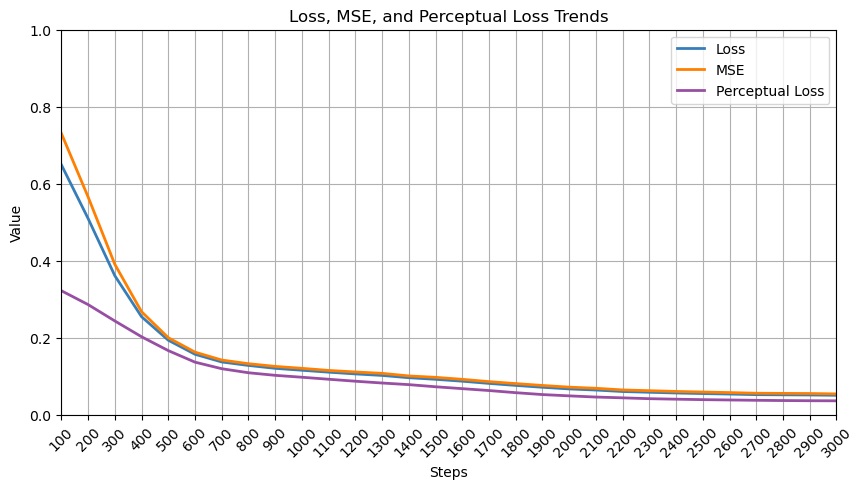

In [40]:
import matplotlib.pyplot as plt
import numpy as np


steps = np.arange(100, 3100, 100)  # Assuming measurements every 100 steps
loss = loss_array
mse = mse_array
perceptual_loss = perceptual_loss_array
# Plot
plt.figure(figsize=(10, 5))
plt.plot(steps, loss, label='Loss', color='#377eb8', linewidth=2)
plt.plot(steps, mse, label='MSE', color='#ff7f00', linewidth=2)
plt.plot(steps, perceptual_loss, label='Perceptual Loss', color='#984ea3', linewidth=2)

# Labels and Title
plt.xlabel('Steps')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.xlim(100,3000)
plt.title('Loss, MSE, and Perceptual Loss Trends')
plt.legend()
plt.grid(True)
plt.xticks(steps, rotation=45)  # Rotate for better visibility

# Show plot
plt.show()


Loss values: [0.653 0.519 0.37 ]
MSE values: [0.735 0.576 0.4  ]
Perceptual loss values: [0.323 0.291 0.251]
Steps: [100 200 300]


In [7]:
filename = "zzh_0_07_r_fine_reconstructed.npy"
path = "zzh/0/07_r/fine_reconstructed.npy"

filename = "dkk_90_01_fine_reconstructed.npy"
path = "dkk/90/01/fine_reconstructed.npy"

In [8]:
import re
import os

def filename_to_path(filename):
    match = re.match(r"(\w+)_(\d+)_(\d+_r?|\d+)_(fine(?:_reconstructed)?|real|synth)(?:\.npy)", filename)
    if not match:
        raise ValueError(f"Filename format not recognized: {filename}")
    
    person, azimuth, elevation, category = match.groups()
    
    return os.path.join(person, azimuth, elevation, f"{category}.npy")

# Example usage
filenames = [
    "zzh_0_07_r_fine_reconstructed.npy",
    "dkk_90_01_fine_reconstructed.npy",
    "dkk_45_06_r_real.npy",
    "zzh_0_08_synth.npy"
]

for filename in filenames:
    print(filename_to_path(filename))


zzh\0\07_r\fine_reconstructed.npy
dkk\90\01\fine_reconstructed.npy
dkk\45\06_r\real.npy
zzh\0\08\synth.npy
